<a href="https://colab.research.google.com/github/busung/data-analysis-by-EDA/blob/main/5_%ED%95%9C%EA%B5%AD_%EA%B3%A0%EB%A0%B9%ED%99%94_%EC%A7%80%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#지도 시각화 둘러보기
* http://python-visualization.github.io/folium/quickstart.html

In [1]:
import folium
m=folium.Map(location=[45.5236,-122.6750])

In [2]:
m

In [3]:
m=folium.Map(location=[45.5236,-122.6750],zoom_start=13)#확대단위 설정가능
m

In [4]:
m = folium.Map(location=[45.372, -121.6972], zoom_start=13)

tooltip = "Click me!"

folium.Marker(
    [45.3288, -121.6625], popup="<i>Mt. Hood Meadows</i>", tooltip=tooltip
).add_to(m)

folium.Marker(
    [45.3311, -121.7113], popup="<b>Timberline Lodge</b>", tooltip=tooltip
).add_to(m)

In [5]:
m

In [6]:
m = folium.Map(location=[45.5236, -122.6750], tiles="Stamen Toner", zoom_start=13)

folium.Circle(
    radius=100,
    location=[45.5244, -122.6699],
    popup="The Waterfront",
    color="crimson",
    fill=False,
).add_to(m)

folium.CircleMarker(
    location=[45.5215, -122.6261],
    radius=50,
    popup="Laurelhurst Park",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

In [7]:
m

In [8]:
import pandas as pd
#미국지도 원본
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)


#이 밑의 코드를 이용해서 미국 지도 위에 덧붙여서 그리는것
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

In [9]:
m

#지도 시각화 연습

##준비하기

In [10]:
!sudo apt install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]

fm._rebuild()

# plt.style.use("seaborn-whitegrid")

path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc("font", family=font_name)
plt.rc('axes', unicode_minus=False)

In [12]:
!gdown --id 1b7E3lOJUuWaasA1Cc_hkBBqHUhb2cyZ2

Downloading...
From: https://drive.google.com/uc?id=1b7E3lOJUuWaasA1Cc_hkBBqHUhb2cyZ2
To: /content/population_using_Korea_map.zip
100% 215k/215k [00:00<00:00, 5.76MB/s]


In [13]:
!unzip -qq -o population_using_Korea_map.zip

In [14]:
population = pd.read_excel("/content/population_raw_data.xlsx",header=1)
population

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,NaN,NaN,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,NaN,NaN,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,NaN,NaN,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,NaN,NaN,남자인구수 (명),235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0
842,NaN,NaN,여자인구수 (명),234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0
843,NaN,서귀포시,총인구수 (명),170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0
844,NaN,NaN,남자인구수 (명),86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0


In [15]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   행정구역(동읍면)별(1)  18 non-null     object 
 1   행정구역(동읍면)별(2)  282 non-null    object 
 2   항목             846 non-null    object 
 3   계              846 non-null    float64
 4   20 - 24세       846 non-null    float64
 5   25 - 29세       846 non-null    float64
 6   30 - 34세       846 non-null    int64  
 7   35 - 39세       846 non-null    float64
 8   65 - 69세       846 non-null    float64
 9   70 - 74세       846 non-null    float64
 10  75 - 79세       846 non-null    int64  
 11  80 - 84세       846 non-null    float64
 12  85 - 89세       846 non-null    float64
 13  90 - 94세       846 non-null    float64
 14  95 - 99세       846 non-null    int64  
 15  100+           846 non-null    float64
dtypes: float64(10), int64(3), object(3)
memory usage: 105.9+ KB


In [16]:
population.head(5)

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,NaN,NaN,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,NaN,NaN,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,NaN,NaN,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


##데이터 전처리

In [17]:
population.fillna(method="pad", inplace=True)#method=pad시 앞에서 나온 제일 최근 값으로 뒤의 na를 채움

In [18]:
population.rename(columns = {"행정구역(동읍면)별(1)":"광역시도","행정구역(동읍면)별(2)":"시도","계":"인구수","항목":"구분"},inplace=True)

In [19]:
population.head(15)

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,전국,소계,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,전국,소계,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,서울특별시,소계,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0
5,서울특별시,소계,여자인구수 (명),5053827.0,343194.0,379724.0,401149,407391.0,237388.0,186814.0,139885,87616.0,46472.0,18007.0,5158,4069.0
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0


In [20]:
population=population[population['시도']!='소계']
population

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,제주특별자치도,제주시,남자인구수 (명),235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0
842,제주특별자치도,제주시,여자인구수 (명),234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0
843,제주특별자치도,서귀포시,총인구수 (명),170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0
844,제주특별자치도,서귀포시,남자인구수 (명),86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0


In [21]:
population[population["구분"]=="총인구수 (명)"].구분="합계"

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [22]:
# 위의 코드는 대입문으로 쓸 수가 없음
population.loc[population["구분"]=="총인구수 (명)","구분"]="합계"
#이렇게 loc를 활용하여야 대입문으로 사용가능
population.loc[population["구분"]=="남자인구수 (명)","구분"]="남자"
population.loc[population["구분"]=="여자인구수 (명)","구분"]="여자"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [23]:
population["구분"]

6      합계
7      남자
8      여자
9      합계
10     남자
       ..
841    남자
842    여자
843    합계
844    남자
845    여자
Name: 구분, Length: 792, dtype: object

##데이터 분석

In [24]:
population["20-39세"]=population["20 - 24세"]+population["25 - 29세"]+population["30 - 34세"]+population["35 - 39세"]
population["65세이상"] = population["65 - 69세"] + population["70 - 74세"] + population["75 - 79세"] + population["80 - 84세"] + population["85 - 89세"] + population["90 - 94세"] + population["95 - 99세"] + population["100+"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
population

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,제주특별자치도,제주시,남자,235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0,63929.0,24084.0
842,제주특별자치도,제주시,여자,234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0,60255.0,35075.0
843,제주특별자치도,서귀포시,합계,170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0,39298.0,30030.0
844,제주특별자치도,서귀포시,남자,86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0,20622.0,12294.0


In [26]:
p=pd.pivot_table(population,index=["광역시도","시도"],columns=['구분'],values=['인구수','20-39세','65세이상'])
p

20-39세                      ...       인구수                    
구분              남자        여자        합계  ...        남자        여자        합계
광역시도 시도                                 ...                              
강원도  강릉시   26286.0   23098.0   49384.0  ...  106231.0  107615.0  213846.0
     고성군    4494.0    2529.0    7023.0  ...   15899.0   14215.0   30114.0
     동해시   11511.0    9753.0   21264.0  ...   47166.0   46131.0   93297.0
     삼척시    8708.0    7115.0   15823.0  ...   35253.0   34346.0   69599.0
     속초시    9956.0    8752.0   18708.0  ...   40288.0   41505.0   81793.0
...            ...       ...       ...  ...       ...       ...       ...
충청북도 진천군    9391.0    7622.0   17013.0  ...   36387.0   33563.0   69950.0
     청원구   32216.0   27805.0   60021.0  ...   97006.0   93807.0  190813.0
     청주시  128318.0  115719.0  244037.0  ...  419323.0  415874.0  835197.0
     충주시   26600.0   22757.0   49357.0  ...  104877.0  103473.0  208350.0
     흥덕구   40933.0   37675.0   78608.0  ...  127647.0  125916.0  253563.0

[264 rows x 9 columns]

In [27]:
p['소멸비율']=p['20-39세']['합계']/p['65세이상']['합계']
p

20-39세                      ...       인구수                소멸비율
구분              남자        여자        합계  ...        여자        합계          
광역시도 시도                                 ...                              
강원도  강릉시   26286.0   23098.0   49384.0  ...  107615.0  213846.0  1.310650
     고성군    4494.0    2529.0    7023.0  ...   14215.0   30114.0  0.982100
     동해시   11511.0    9753.0   21264.0  ...   46131.0   93297.0  1.405977
     삼척시    8708.0    7115.0   15823.0  ...   34346.0   69599.0  1.083025
     속초시    9956.0    8752.0   18708.0  ...   41505.0   81793.0  1.467064
...            ...       ...       ...  ...       ...       ...       ...
충청북도 진천군    9391.0    7622.0   17013.0  ...   33563.0   69950.0  1.504776
     청원구   32216.0   27805.0   60021.0  ...   93807.0  190813.0  2.952191
     청주시  128318.0  115719.0  244037.0  ...  415874.0  835197.0  2.665527
     충주시   26600.0   22757.0   49357.0  ...  103473.0  208350.0  1.418712
     흥덕구   40933.0   37675.0   78608.0  ...  125916.0  253563.0  3.350867

[264 rows x 10 columns]

In [28]:
p['소멸위기지역']=p['소멸비율']<1.0
p

20-39세                      ...       인구수      소멸비율 소멸위기지역
구분              남자        여자        합계  ...        합계                 
광역시도 시도                                 ...                           
강원도  강릉시   26286.0   23098.0   49384.0  ...  213846.0  1.310650  False
     고성군    4494.0    2529.0    7023.0  ...   30114.0  0.982100   True
     동해시   11511.0    9753.0   21264.0  ...   93297.0  1.405977  False
     삼척시    8708.0    7115.0   15823.0  ...   69599.0  1.083025  False
     속초시    9956.0    8752.0   18708.0  ...   81793.0  1.467064  False
...            ...       ...       ...  ...       ...       ...    ...
충청북도 진천군    9391.0    7622.0   17013.0  ...   69950.0  1.504776  False
     청원구   32216.0   27805.0   60021.0  ...  190813.0  2.952191  False
     청주시  128318.0  115719.0  244037.0  ...  835197.0  2.665527  False
     충주시   26600.0   22757.0   49357.0  ...  208350.0  1.418712  False
     흥덕구   40933.0   37675.0   78608.0  ...  253563.0  3.350867  False

[264 rows x 11 columns]

In [29]:
p[p["소멸위기지역"]==True].index.get_level_values(1)
#인덱스가 멀티 인덱스일 때 ()안의 값으로 level을 지정하여 인덱스를 반환하는 함수
#여기서 ()가 0이 되면 level0인덱스인 광역시도를
#()가 1이 되면 level1인덱스인 시도의 인덱스를 반환해 준다

Index(['고성군', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군', '거창군',
       '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함양군', '합천군', '고령군',
       '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군', '영주시', '영천시', '예천군',
       '울릉군', '울진군', '의성군', '청도군', '청송군', '강화군', '강진군', '고흥군', '곡성군', '구례군',
       '담양군', '보성군', '신안군', '영광군', '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군',
       '해남군', '화순군', '고창군', '김제시', '남원시', '무주군', '부안군', '순창군', '임실군', '장수군',
       '정읍시', '진안군', '공주시', '금산군', '논산시', '보령시', '부여군', '서천군', '예산군', '청양군',
       '태안군', '괴산군', '단양군', '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

In [30]:
p.index

MultiIndex([( '강원도', '강릉시'),
            ( '강원도', '고성군'),
            ( '강원도', '동해시'),
            ( '강원도', '삼척시'),
            ( '강원도', '속초시'),
            ( '강원도', '양구군'),
            ( '강원도', '양양군'),
            ( '강원도', '영월군'),
            ( '강원도', '원주시'),
            ( '강원도', '인제군'),
            ...
            ('충청북도', '영동군'),
            ('충청북도', '옥천군'),
            ('충청북도', '음성군'),
            ('충청북도', '제천시'),
            ('충청북도', '증평군'),
            ('충청북도', '진천군'),
            ('충청북도', '청원구'),
            ('충청북도', '청주시'),
            ('충청북도', '충주시'),
            ('충청북도', '흥덕구')],
           names=['광역시도', '시도'], length=264)

In [31]:
p.reset_index(inplace=True)

In [32]:
p.columns

MultiIndex([(  '광역시도',   ''),
            (    '시도',   ''),
            ('20-39세', '남자'),
            ('20-39세', '여자'),
            ('20-39세', '합계'),
            ( '65세이상', '남자'),
            ( '65세이상', '여자'),
            ( '65세이상', '합계'),
            (   '인구수', '남자'),
            (   '인구수', '여자'),
            (   '인구수', '합계'),
            (  '소멸비율',   ''),
            ('소멸위기지역',   '')],
           names=[None, '구분'])

In [33]:
p

광역시도   시도    20-39세            ...       인구수                소멸비율 소멸위기지역
구분                    남자        여자  ...        여자        합계                 
0     강원도  강릉시   26286.0   23098.0  ...  107615.0  213846.0  1.310650  False
1     강원도  고성군    4494.0    2529.0  ...   14215.0   30114.0  0.982100   True
2     강원도  동해시   11511.0    9753.0  ...   46131.0   93297.0  1.405977  False
3     강원도  삼척시    8708.0    7115.0  ...   34346.0   69599.0  1.083025  False
4     강원도  속초시    9956.0    8752.0  ...   41505.0   81793.0  1.467064  False
..    ...  ...       ...       ...  ...       ...       ...       ...    ...
259  충청북도  진천군    9391.0    7622.0  ...   33563.0   69950.0  1.504776  False
260  충청북도  청원구   32216.0   27805.0  ...   93807.0  190813.0  2.952191  False
261  충청북도  청주시  128318.0  115719.0  ...  415874.0  835197.0  2.665527  False
262  충청북도  충주시   26600.0   22757.0  ...  103473.0  208350.0  1.418712  False
263  충청북도  흥덕구   40933.0   37675.0  ...  125916.0  253563.0  3.350867  False

[264 rows x 13 columns]

In [34]:
_tmp = [p.columns.get_level_values(0)[n] + p.columns.get_level_values(1)[n] for n in range(0,len(p.columns.get_level_values(0)))]
p.columns = _tmp
p.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.310650,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.982100,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.405977,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,1.083025,False
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.467064,False


In [35]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      264 non-null    object 
 1   시도        264 non-null    object 
 2   20-39세남자  264 non-null    float64
 3   20-39세여자  264 non-null    float64
 4   20-39세합계  264 non-null    float64
 5   65세이상남자   264 non-null    float64
 6   65세이상여자   264 non-null    float64
 7   65세이상합계   264 non-null    float64
 8   인구수남자     264 non-null    float64
 9   인구수여자     264 non-null    float64
 10  인구수합계     264 non-null    float64
 11  소멸비율      264 non-null    float64
 12  소멸위기지역    264 non-null    bool   
dtypes: bool(1), float64(10), object(2)
memory usage: 25.1+ KB


#지도 시각화

##시도 확인

In [36]:
p

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.310650,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.982100,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.405977,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,1.083025,False
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.467064,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,충청북도,진천군,9391.0,7622.0,17013.0,4731.0,6575.0,11306.0,36387.0,33563.0,69950.0,1.504776,False
260,충청북도,청원구,32216.0,27805.0,60021.0,8417.0,11914.0,20331.0,97006.0,93807.0,190813.0,2.952191,False
261,충청북도,청주시,128318.0,115719.0,244037.0,37882.0,53671.0,91553.0,419323.0,415874.0,835197.0,2.665527,False
262,충청북도,충주시,26600.0,22757.0,49357.0,14407.0,20383.0,34790.0,104877.0,103473.0,208350.0,1.418712,False


In [37]:
si_name = [None] * len(p)
tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'], 
                       '성남':['수정구', '중원구', '분당구'], 
                       '안양':['만안구', '동안구'], 
                       '안산':['상록구', '단원구'], 
                       '고양':['덕양구', '일산동구', '일산서구'], 
                       '용인':['처인구', '기흥구', '수지구'], 
                       '청주':['상당구', '서원구', '흥덕구', '청원구'], 
                       '천안':['동남구', '서북구'], 
                       '전주':['완산구', '덕진구'], 
                       '포항':['남구', '북구'], 
                       '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'], 
                       '부천':['오정구', '원미구', '소사구']}

In [38]:
for n in p.index:
    if p['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        if p['시도'][n][:-1]=='고성' and p['광역시도'][n]=='강원도':
            si_name[n] = '고성(강원)'
        elif p['시도'][n][:-1]=='고성' and p['광역시도'][n]=='경상남도':
            si_name[n] = '고성(경남)'
        else:
             si_name[n] = p['시도'][n][:-1]
                
        for keys, values in tmp_gu_dict.items():
            if p['시도'][n] in values:
                if len(p['시도'][n])==2:
                    si_name[n] = keys + ' ' + p['시도'][n]
                elif p['시도'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' ' + p['시도'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + p['시도'][n][:-1]
        
    elif p['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
        
    else:
        if len(p['시도'][n])==2:
            si_name[n] = p['광역시도'][n][:2] + ' ' + p['시도'][n]
        else:
            si_name[n] = p['광역시도'][n][:2] + ' ' + p['시도'][n][:-1]

In [39]:
p["ID"] = si_name
p

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.310650,False,강릉
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.982100,True,고성(강원)
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.405977,False,동해
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,1.083025,False,삼척
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.467064,False,속초
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,충청북도,진천군,9391.0,7622.0,17013.0,4731.0,6575.0,11306.0,36387.0,33563.0,69950.0,1.504776,False,진천
260,충청북도,청원구,32216.0,27805.0,60021.0,8417.0,11914.0,20331.0,97006.0,93807.0,190813.0,2.952191,False,청주 청원
261,충청북도,청주시,128318.0,115719.0,244037.0,37882.0,53671.0,91553.0,419323.0,415874.0,835197.0,2.665527,False,청주
262,충청북도,충주시,26600.0,22757.0,49357.0,14407.0,20383.0,34790.0,104877.0,103473.0,208350.0,1.418712,False,충주


##지도 데이터 불러오기

In [40]:
draw_korea_raw = pd.read_excel('/content/draw_korea_raw.xlsx')
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


###시각화를 위한 고유번호 생성

In [41]:
draw_korea_raw_stacked=pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={"level_0":"y","level_1":"x",0:"ID"},inplace=True)
draw_korea=draw_korea_raw_stacked
draw_korea

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [42]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

###지도 시각화

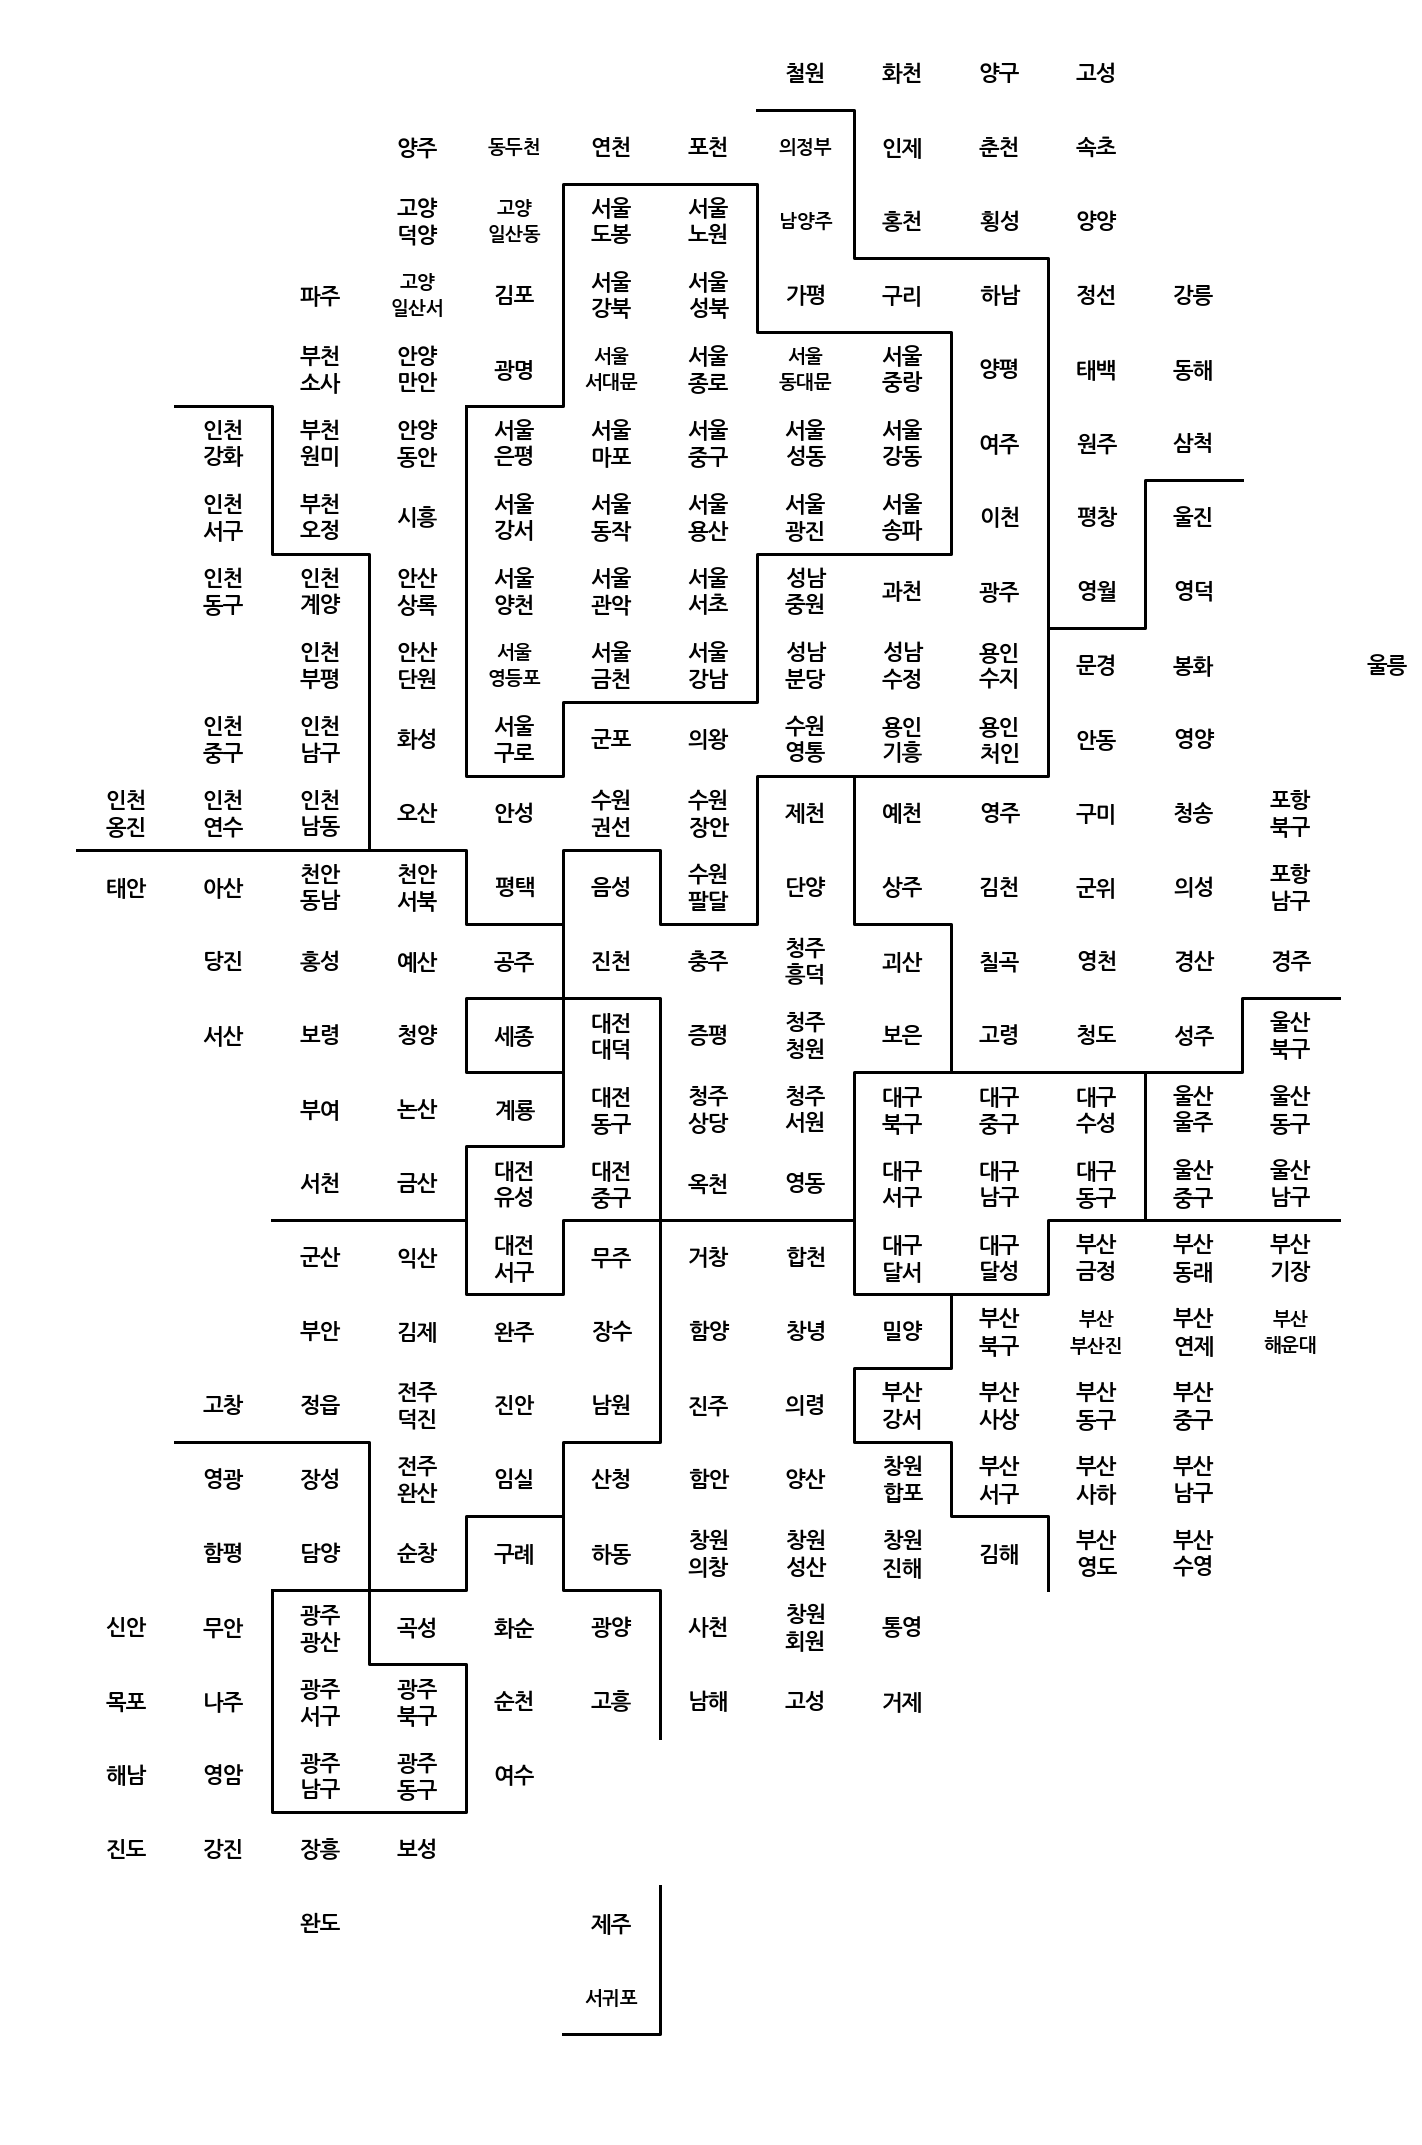

In [43]:
plt.figure(figsize=(10,15))

for idx, row in draw_korea.iterrows():   
  if len(row["ID"].split())==2:
    dispname = f"{row['ID'].split()[0]}\n{row['ID'].split()[1]}"
  elif row["ID"][:2]=="고성":
    dispname = "고성"
  else:
    dispname = row['ID']

  if len(dispname.splitlines()[-1]) >= 3:
    fontsize, linespacing = 9.5, 1.5
  else:
    fontsize, linespacing = 11, 1.2
  #길자 길이가 다 다르기 때문에 길이따른 글자 크기 조절(위의코드)
  plt.annotate(dispname, (row["x"]+0.5, row["y"]+0.5), weight="bold",
                fontsize=fontsize, ha="center", va="center", 
                linespacing=linespacing)

for path in BORDER_LINES:
  ys, xs = zip(*path)
  plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()

plt.axis("off")

plt.tight_layout()
plt.show()

##지도 시각화 실전용

In [44]:
p_folium = p.set_index('ID')
p_folium

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
ID,,,,,,,,,,,,,
강릉,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.310650,False
고성(강원),강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.982100,True
동해,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.405977,False
삼척,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,1.083025,False
속초,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.467064,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
진천,충청북도,진천군,9391.0,7622.0,17013.0,4731.0,6575.0,11306.0,36387.0,33563.0,69950.0,1.504776,False
청주 청원,충청북도,청원구,32216.0,27805.0,60021.0,8417.0,11914.0,20331.0,97006.0,93807.0,190813.0,2.952191,False
청주,충청북도,청주시,128318.0,115719.0,244037.0,37882.0,53671.0,91553.0,419323.0,415874.0,835197.0,2.665527,False


In [45]:
import json
geo_str = json.load(open("skorea_municipalities_geo_simple.json", encoding="utf-8"))

map = folium.Map(location=[36.2002, 127.054], zoom_start=8)
map.choropleth(geo_data=geo_str, 
               data=p_folium["소멸위기지역"],
               columns = [p_folium.index, p_folium["소멸위기지역"]],
               fill_color = 'YlGnBu',
               key_on = 'feature.id')
map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
